# **IMPLEMENTING SIMPLE LINEAR REGRESSION ON ADVERTISING DATASET**

In this Jupyter Notebook, we will implement a simple linear regression model which takes TV advertising as input and predicts the corresponding sales.

# **Import Required Libraries**

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Dataset**

In [391]:
file_path = "advertising.csv"
df = pd.read_csv(file_path)

# **Display dataset information**

In [392]:
print("Dataset Information:")
df.info()
print("\nFirst 5 rows:\n", df.head())
print("\nSummary Statistics:\n", df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

First 5 rows:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Summary Statistics:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000

# **Check for missing values**

In [393]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# **Outlier Detection using IQR**

In [394]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected per feature:\n", outliers)


Outliers detected per feature:
 TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64


# **Remove outliers**

In [395]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [396]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# **Additional Data Analysis**

# Histogram of TV Advertising Spend and Sales

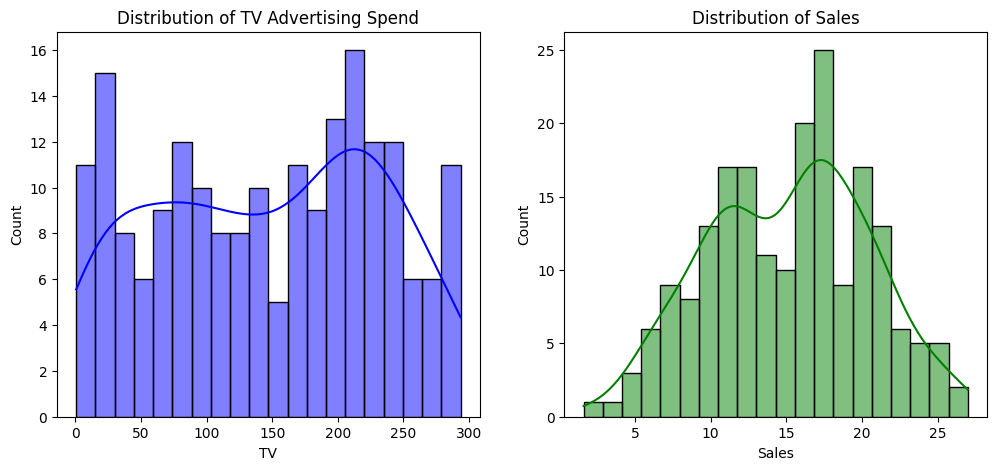

In [397]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['TV'], bins=20, kde=True, color='blue')
plt.title("Distribution of TV Advertising Spend")

plt.subplot(1, 2, 2)
sns.histplot(df['Sales'], bins=20, kde=True, color='green')
plt.title("Distribution of Sales")
plt.show()

# Plot correlation heatmap

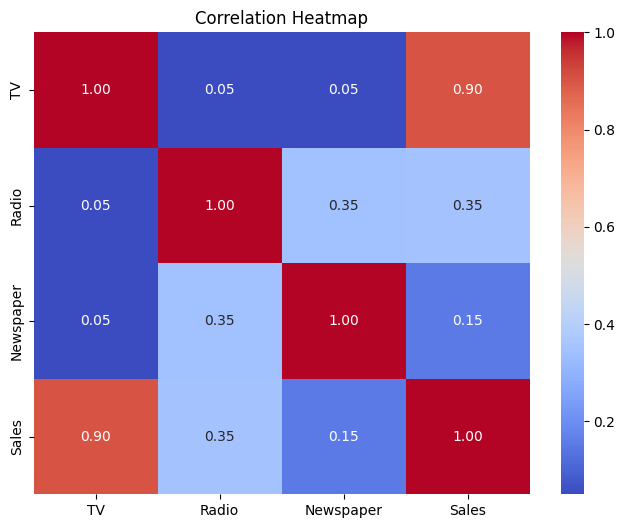

In [398]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **Select features (TV advertising) and target (Sales)**

In [399]:
X = df[['TV']].values  # Independent variable
y = df[['Sales']].values  # Dependent variable

# **Normalize the data**

In [400]:
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)


# **Split the dataset into training (80%) and testing (20%) sets**

In [401]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 158, Testing samples: 40


# **Define loss function (Mean Absolute Error)**

In [402]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# **Define Mean Squared Error (MSE) loss function**

In [403]:
def compute_loss(X, y, w, b):
    m = len(y)
    predictions = X * w + b
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

# **Adaptive learning rate using decay & Stochastic Gradient Descent (SGD)**

In [404]:
def adaptive_lr(initial_lr, epoch, decay_rate=0.05):
    return initial_lr / (1 + decay_rate * epoch)

def stochastic_gradient_descent(X, y, w, b, initial_lr=0.01, epochs=1000):
    m = len(y)
    loss_history = []

    for epoch in range(epochs):
        lr = adaptive_lr(initial_lr, epoch)

        for i in range(m):
            index = np.random.randint(0, m)
            xi = X[index]
            yi = y[index]

            prediction = xi * w + b
            error = prediction - yi

            dw = error * xi
            db = error

            w -= lr * dw
            b -= lr * db

        loss = mae(y, X * w + b)
        loss_history.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return w, b, loss_history

# **Initialize parameters**

In [405]:
w = np.random.randn()
b = np.random.randn()

# **Train model using SGD**

In [406]:
optimized_w, optimized_b, loss_history = stochastic_gradient_descent(X_train, y_train, w, b)
print("Optimized parameters:", optimized_w, optimized_b)

Epoch 0: Loss = 0.4862
Epoch 100: Loss = 0.3455
Epoch 200: Loss = 0.3460
Epoch 300: Loss = 0.3451
Epoch 400: Loss = 0.3451
Epoch 500: Loss = 0.3448
Epoch 600: Loss = 0.3451
Epoch 700: Loss = 0.3450
Epoch 800: Loss = 0.3448
Epoch 900: Loss = 0.3447
Optimized parameters: [0.89968292] [0.00667992]


# **Plot loss curve**

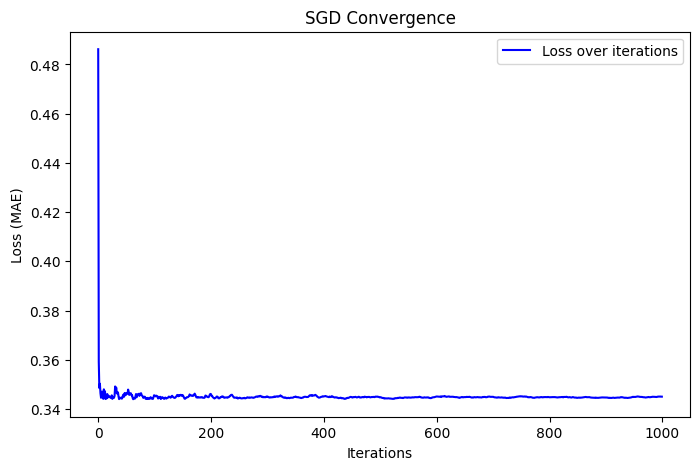

In [407]:
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Loss over iterations", color="b")
plt.xlabel("Iterations")
plt.ylabel("Loss (MAE)")
plt.title("SGD Convergence")
plt.legend()
plt.show()

# **Compute Adjusted R² Score**

In [408]:
def adjusted_r2(y_true, y_pred, n, p):
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# **Residual Analysis**

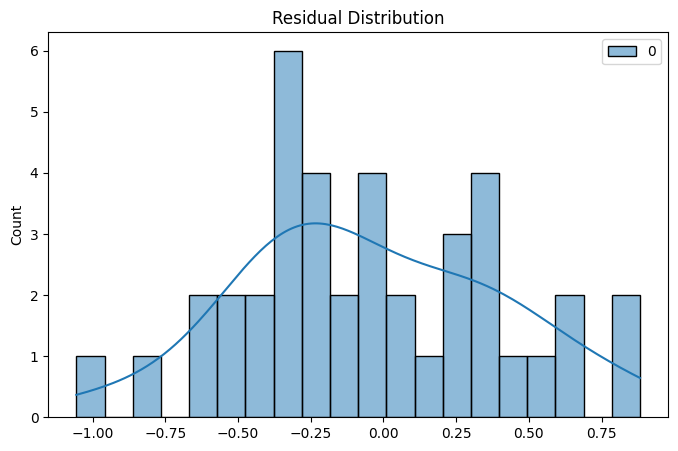

In [409]:
residuals = y_test - (X_test * optimized_w + optimized_b)
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.title("Residual Distribution")
plt.show()

# **Compute model performance**

In [410]:
mae_value = mae(y_test, X_test * optimized_w + optimized_b)
adj_r2_value = adjusted_r2(y_test, X_test * optimized_w + optimized_b, len(y_test), 1)
print(f"Final Model Performance: MAE = {mae_value:.4f}, Adjusted R² Score = {adj_r2_value:.4f}")

Final Model Performance: MAE = 0.3678, Adjusted R² Score = 0.7936


# **Plot regression line**

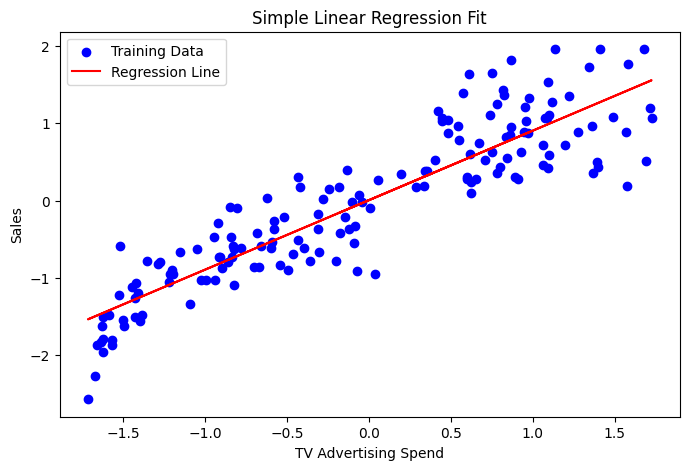

In [411]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.plot(X_train, X_train * optimized_w + optimized_b, color='red', label="Regression Line")
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Simple Linear Regression Fit")
plt.legend()
plt.show()

# **Make predictions on test set**

In [414]:
# Function to make predictions
def predict(tv_ad_spend, w, b):
    tv_ad_spend = (tv_ad_spend - np.mean(df['TV'])) / np.std(df['TV'])  # Normalize input
    predicted_sales = tv_ad_spend * w + b  # Compute prediction
    predicted_sales = predicted_sales * np.std(df['Sales']) + np.mean(df['Sales'])  # Denormalize output
    return predicted_sales

# Take user input for TV advertising spend
tv_input = float(input("Enter TV advertising spend: "))
predicted_sales = predict(tv_input, optimized_w, optimized_b)
# Extract the single value from the NumPy array
predicted_sales_value = predicted_sales.item()  # or predicted_sales[0]
print(f"Predicted Sales: {predicted_sales_value:.2f}") # Format the single value

Enter TV advertising spend: 283.6
Predicted Sales: 22.73


# Authored by **Farhan Raza**

# ***Thank you !***